In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rlway.pyosrd import OSRD

In [3]:
OSRD.use_cases

['cvg_dvg', 'point_switch', 'station_capacity2']

In [4]:
use_case='point_switch'
sim = OSRD(use_case=use_case, dir='tmp')

[15:12:39,576] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[15:12:39,604] [INFO]              [FullInfra] parsing infra
[15:12:39,662] [INFO]              [FullInfra] adaptation to kotlin
[15:12:39,691] [INFO]              [FullInfra] loading signals
[15:12:39,696] [INFO]              [FullInfra] building blocks
[15:12:39,701] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[15:12:39,713] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[15:12:39,757] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[15:12:39,762] [INFO]  [StandaloneSimulationCommand] All simulations completed
[15:12:39,762] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


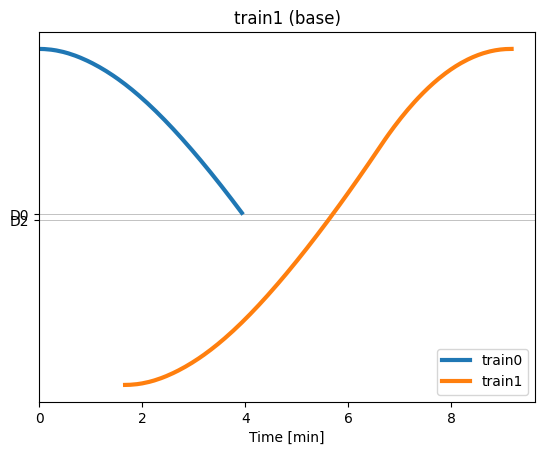

In [17]:
ax = sim.space_time_graph(1, points_to_show=['detector'])

In [6]:
sim.points_encountered_by_train(0)

[{'id': 'departure_train0', 'offset': 0.0, 'type': 'departure', 't_base': 0.0},
 {'id': 'S0',
  'offset': 9750.0,
  'type': 'signal',
  't_base': 236.59084378700044},
 {'id': 'D0',
  'offset': 9770.0,
  'type': 'detector',
  't_base': 236.87974331937096},
 {'id': 'DVG',
  'offset': 19950.0,
  'type': 'switch',
  't_base': 450.2103472703495},
 {'id': 'D1',
  'offset': 20130.0,
  'type': 'detector',
  't_base': 450.2103472703495},
 {'id': 'S1',
  'offset': 20150.0,
  'type': 'signal',
  't_base': 450.2103472703495},
 {'id': 'arrival_train0',
  'offset': 29900.0,
  'type': 'arrival',
  't_base': 450.2103472703495}]

In [7]:
sim.route_tvds

{'rt.buffer_stop.0->D0': 'D0<->buffer_stop.0',
 'rt.D0->buffer_stop.1': 'DVG',
 'rt.D0->buffer_stop.2': 'DVG',
 'rt.buffer_stop.1->D1': 'D1<->buffer_stop.1',
 'rt.D1->buffer_stop.0': 'DVG',
 'rt.buffer_stop.2->D2': 'D2<->buffer_stop.2',
 'rt.D2->buffer_stop.0': 'DVG'}

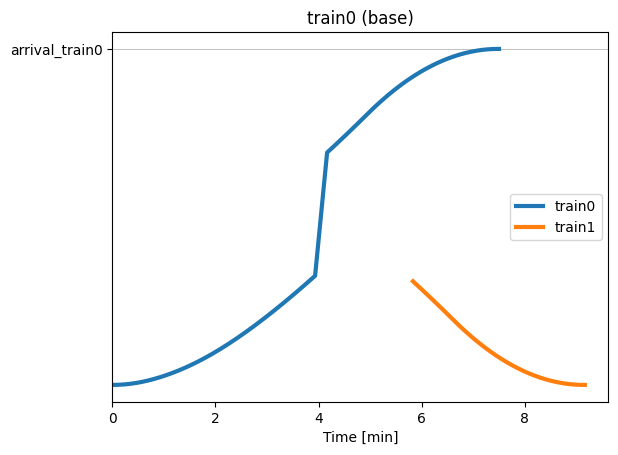

In [8]:
sim.space_time_graph(0);

In [9]:
sim.points_encountered_by_train(0, types=['switch'])

[{'id': 'DVG',
  'offset': 19950.0,
  'type': 'switch',
  't_base': 450.2103472703495}]

In [10]:
34/6.

5.666666666666667